In [15]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2
import matplotlib.pyplot as plt

In [2]:
feature_list = np.array(pickle.load(open('feature_values.pkl','rb'))) #feature_list was not in terms of array
filenames = pickle.load(open('filenames.pkl','rb'))

In [3]:
type(feature_list)

numpy.ndarray

In [4]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [32]:
img = image.load_img('testing_samples/shoe.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

1/1 [==============================] - 0s 279ms/step


In [33]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

In [34]:
print(indices)

[[ 560 2258 1170 2275 1775 2001]]


In [35]:
from tqdm import tqdm


In [9]:
# for file in tqdm(indices[0][1:3]):
#     temp_img = cv2.imread(filenames[file])
#     cv2.imshow('output',cv2.resize(temp_img,(512,512)))
#     cv2.waitKey(0)

In [10]:
!pip install tqdm

In [39]:
normalized_result[560] #Gives the eucledian distance

0.0

In [40]:
filenames[560]

'images\\24258.jpg'

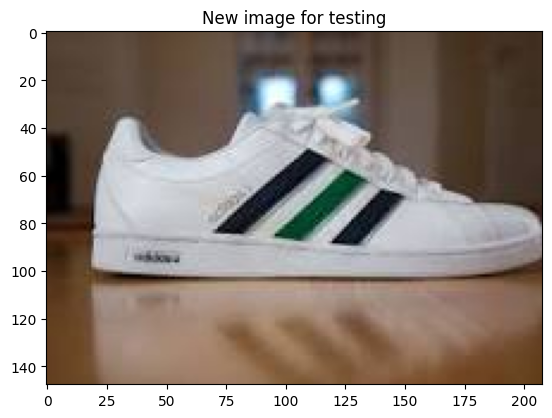

In [30]:
test_image=plt.imread('testing_samples/shoe.jpg')
plt.title('New image for testing')
plt.imshow(test_image)



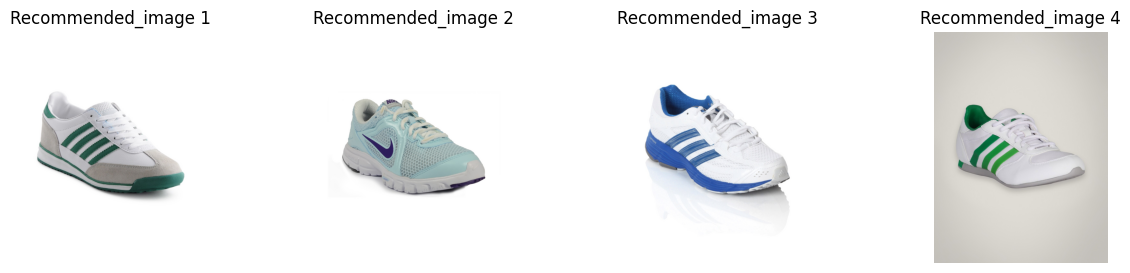

In [54]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
plt.title("Recommended Images")

# Display images
for i, idx in enumerate(indices[0][0:4]):
    img = plt.imread(filenames[idx])
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels
    axes[i].set_title(f'Recommended_image {i+1}')

plt.show()